La convolution est une intégrale qui exprime le degré de chevauchement d'une fonction $h$ lorsqu'elle est décalée sur une autre fonction $x$.

Par définition, une convolution $x\ast h$ se mesure par l'équation suivante :

$$
x\ast h \;=\; \displaystyle\int_{0}^{t}h(t-\varsigma)x(\varsigma)d\varsigma.
$$

Ce produit est utilisé fréquemment pour le filtrage d'un signal contaminé par du bruit gênant ainsi la perception correcte de l'information. Un produit de convolution peut être vu comme une technique de calcul de moyenne à un instant $t$ d'une fonction $x$ pondérée par la fonction $h$ et vice-versa.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tikzplotlib as mikz

On se propose de générer un signal sinusoïdal d'amplitude $1$ et de fréquence $1$ Hz que l'on note $x(t)$. 

$$
x(t) \;=\; \displaystyle\sin\left(2\pi f t\right),\quad\text{avec}\quad f \,=\, 1\,\text{Hz}.
$$

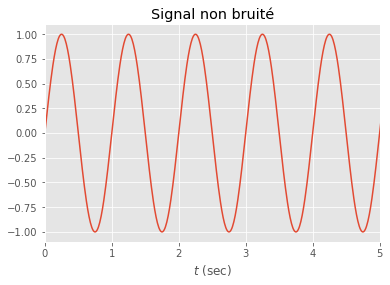

In [2]:
t = np.linspace(0, 10.0, 1000)
x = np.sin(2 * np.pi * t) 
plt.plot(t, x)
plt.title("Signal non bruité")
plt.grid(True)
plt.xlabel("$t$ (sec)")
plt.xlim(0, 5)
mikz.save("fct-sin.tex")
plt.show()

Nous synthétisons ici un exemple de bruit :

$$
b(t) \;=\; 
-0.4 \displaystyle\sin\left(2\pi f_{\text{b}_1} t\right)
+0.6 \displaystyle\sin\left(2\pi f_{\text{b}_2} t\right),
\quad\text{avec}\quad \left\{\begin{array}{lcl}f_{\text{b}_1}&=& 250,\,\text{Hz}\\&&\\ f_{\text{b}_2}&=& 350\,\text{Hz}.\end{array}\right.
$$

Nous le rajouterons par la suite au signal d'origine $x(t)$ comme suit :

$$
x_\text{b} \;=\; x(t) + b(t)
$$

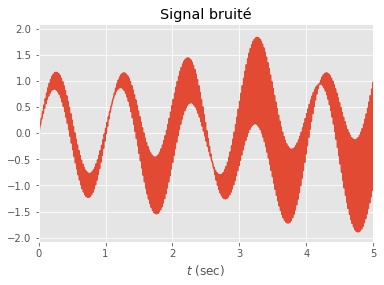

In [3]:
bruit = -0.4 * np.sin(500 * np.pi * t) + 0.6 * np.sin(700 * np.pi * t) # Génération du bruit
x_bruit = x + bruit
plt.plot(t, x_bruit)
plt.title("Signal bruité")
plt.grid(True)
plt.xlabel("$t$ (sec)")
plt.xlim(0, 5)
mikz.save("fct-sin-bruit.tex")
plt.show()

Le filtre à appliquer s'agit d'un passe-bas de réponse impulsionnelle :

$$
h(t) \;=\; \displaystyle\frac{1}{\tau}\mathrm{e}^{-\displaystyle\frac{t}{\tau}},\quad\text{avec}\quad \tau\,=\, 0.4\,\text{sec}.
$$

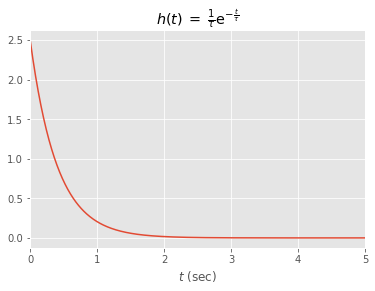

In [4]:
t_filt = np.linspace(0, 5, 1000)
filt = 2.5 * np.exp(-t/0.4)
plt.plot(t, filt)
plt.title(r"$h(t) \;=\; \frac{1}{\tau}\mathrm{e}^{-\frac{t}{\tau}}$")
plt.grid(True)
plt.xlabel("$t$ (sec)")
plt.xlim(0, 5)
mikz.save("filtre.tex")
plt.show()

La sortie $\tilde{x}$ du filtre est le résultat du produit de convolution suivant :

$$
\tilde{x}(t) \;=\; \displaystyle\int_{0}^{t}h(t-\varsigma)x(\varsigma)d\varsigma
$$

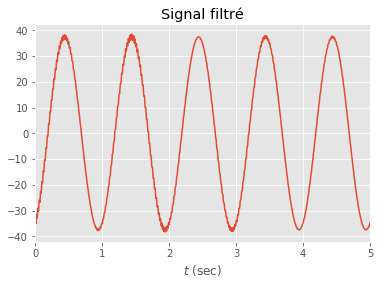

In [5]:
x_filt = np.convolve(x_bruit, filt, 'same')
n, = x_filt.shape
plt.plot(t, x_filt)
plt.title("Signal filtré")
plt.grid(True)
plt.xlabel("$t$ (sec)")
plt.xlim(0, 5)
mikz.save("filt-sin.tex")
plt.show()